In [1]:
import json
import os

import pandas as pd
import numpy as np

import sys
sys.path.append('../scripts')
import isic_utils
sys.path.append('../../code/scripts')
import dataset_chunking_fxns

import seaborn as sns
import matplotlib.pyplot as plt

import plotting as p

In [2]:
no_sonic_file = '/data/erolf/multi-acc/data/isic/df_no_sonic_age_over_50_id_5_fold_splits.csv' # TODO
df_no_sonic = pd.read_csv(no_sonic_file)

with_sonic_file = '/data/erolf/multi-acc/data/isic/df_with_sonic_study_name_id.csv' # TODO
df_with_sonic = pd.read_csv(with_sonic_file)


In [3]:
df_no_sonic.groupby(['age_over_50_id']).mean()['benign_malignant_01']

age_over_50_id
0    0.083662
1    0.313783
Name: benign_malignant_01, dtype: float64

In [4]:
df_with_sonic.groupby(['fold']).count()#['study_name_aggregated']

,id,image_name,study_name,image_type,age_approx,anatom_site_general,benign_malignant,diagnosis,diagnosis_confirm_type,melanocytic,...,study_name_aggregated,study_name_id,study_name_aggregated_id,age_approx_by_decade_id,age_over_45_id,age_over_50_id,age_over_55_id,age_over_60_id,anatom_site_general_id,sex_id
fold,,,,,,,,,,,,,,,,,,,,,
test,4238,4238,4238,4238,4238,4238,4238,4205,4196,4205,...,4238,4238,4238,4238,4238,4238,4238,4238,4238,4238
train,16965,16965,16965,16965,16965,16965,16965,16816,16801,16816,...,16965,16965,16965,16965,16965,16965,16965,16965,16965,16965


In [5]:
df_with_sonic

,id,image_name,study_name,image_type,age_approx,anatom_site_general,benign_malignant,diagnosis,diagnosis_confirm_type,melanocytic,...,study_name_id,study_name_aggregated_id,age_approx_by_decade_id,age_over_45_id,age_over_50_id,age_over_55_id,age_over_60_id,anatom_site_general_id,sex_id,fold
0,581cd8d69fc3c13dcd0e3568,ISIC_0013830.jpeg,MSK-4,dermoscopic,55.0,lower extremity,benign,nevus,histopathology,True,...,5,2,5,1,1,0,0,3,0,train
1,589de22fd83113657d7b1732,ISIC_0016041.jpeg,MSK-4,dermoscopic,55.0,unknown,benign,nevus,histopathology,True,...,5,2,5,1,1,0,0,6,1,train
2,581cd61b9fc3c13dcd0e0b5c,ISIC_0012710.jpeg,MSK-4,dermoscopic,55.0,upper extremity,benign,nevus,histopathology,True,...,5,2,5,1,1,0,0,7,0,test
3,558d60b2bae47801cf734471,ISIC_0009960.jpeg,MSK-2,dermoscopic,50.0,lower extremity,malignant,melanoma,histopathology,True,...,3,2,5,1,0,0,0,3,0,train
4,581cd8dd9fc3c13dcd0e35d7,ISIC_0013841.jpeg,MSK-4,dermoscopic,65.0,posterior torso,benign,seborrheic keratosis,histopathology,False,...,5,2,6,1,1,1,1,5,0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21198,54e7d784bae4780ec59cb5ee,ISIC_0002134.jpeg,SONIC,dermoscopic,15.0,unknown,benign,nevus,single image expert consensus,True,...,7,3,1,0,0,0,0,6,1,train
21199,54e7dd4bbae4780ec59cdbdf,ISIC_0004075.jpeg,SONIC,dermoscopic,15.0,unknown,benign,nevus,single image expert consensus,True,...,7,3,1,0,0,0,0,6,0,train
21200,54e7dd16bae4780ec59cda72,ISIC_0004002.jpeg,SONIC,dermoscopic,15.0,unknown,benign,nevus,single image expert consensus,True,...,7,3,1,0,0,0,0,6,1,train
21201,54e7e140bae4780ec59cf6d9,ISIC_0005456.jpeg,SONIC,dermoscopic,10.0,unknown,benign,nevus,single image expert consensus,True,...,7,3,1,0,0,0,0,6,1,train


In [6]:
df_with_sonic.groupby(['fold','study_name_aggregated_id']).count()#['study_name_aggregated']

id  image_name  study_name  image_type  \
fold  study_name_aggregated_id                                             
test  0                           17          17          17          17   
      1                         1555        1555        1555        1555   
      2                          748         748         748         748   
      3                         1850        1850        1850        1850   
      4                           68          68          68          68   
train 0                           71          71          71          71   
      1                         6220        6220        6220        6220   
      2                         3001        3001        3001        3001   
      3                         7401        7401        7401        7401   
      4                          272         272         272         272   

                                age_approx  anatom_site_general  \
fold  study_name_aggregated_id                                    
test  0                                 17                   17   
      1                               1555                 1555   
      2                                748                  748   
      3                               1850                 1850   
      4                                 68                   68   
train 0                                 71                   71   
      1                               6220                 6220   
      2                               3001                 3001   
      3                               7401                 7401   
      4                                272                  272   

                                benign_malignant  diagnosis  \
fold  study_name_aggregated_id                                
test  0                                       17         17   
      1                                     1555       1555   
      2                                      748        716   
      3                                     1850       1850   
      4                                       68         67   
train 0                                       71         71   
      1                                     6220       6220   
      2                                     3001       2852   
      3                                     7401       7401   
      4                                      272        272   

                                diagnosis_confirm_type  melanocytic  ...  \
fold  study_name_aggregated_id                                       ...   
test  0                                             17           17  ...   
      1                                           1555         1555  ...   
      2                                            748          716  ...   
      3                                           1850         1850  ...   
      4                                             26           67  ...   
train 0                                             71           71  ...   
      1                                           6220         6220  ...   
      2                                           3000         2852  ...   
      3                                           7401         7401  ...   
      4                                            109          272  ...   

                                age_over_60  study_name_aggregated  \
fold  study_name_aggregated_id                                       
test  0                                  17                     17   
      1                                1555                   1555   
      2                                 748                    748   
      3                                1850                   1850   
      4                                  68                     68   
train 0                                  71                     71   
      1                                6220                   6220   
      2         

In [7]:
df_with_sonic['study_name_aggregate'] = df_with_sonic['study_name'].replace({'MSK-1': 'MSK',
                                                                             'MSK-2': 'MSK',
                                                                             'MSK-3': 'MSK',
                                                                             'MSK-4': 'MSK',
                                                                             'MSK-5': 'MSK',
                                                                             'UDA-1': 'UDA',
                                                                             'UDA-2': 'UDA'})

np.unique(df_with_sonic['study_name_aggregate'])

array(['2018 JID Editorial Images', 'HAM10000', 'MSK', 'SONIC', 'UDA'],
      dtype=object)

In [8]:
df_train = df_no_sonic[df_no_sonic['fold'] == 'train']
(df_train['age_over_50_id'] == 1).sum()

4092

In [9]:
(df_with_sonic['study_name'] == 'SONIC').sum()/len(df_with_sonic['study_name'])

0.43630618308729896

In [10]:
n_train = len(df_train)

In [11]:
x = (n_train- (df_train['study_name_id'] == 0).sum() )/n_train

In [12]:
len(df_with_sonic) -len(df_train)

11641

In [13]:
total_num_pts = df_with_sonic.groupby(['study_name']).count()['id'].values
total_num_mal = df_with_sonic.groupby(['study_name']).sum()['benign_malignant_01'].values

In [14]:
# sort by largest
sorter = np.argsort(total_num_pts)

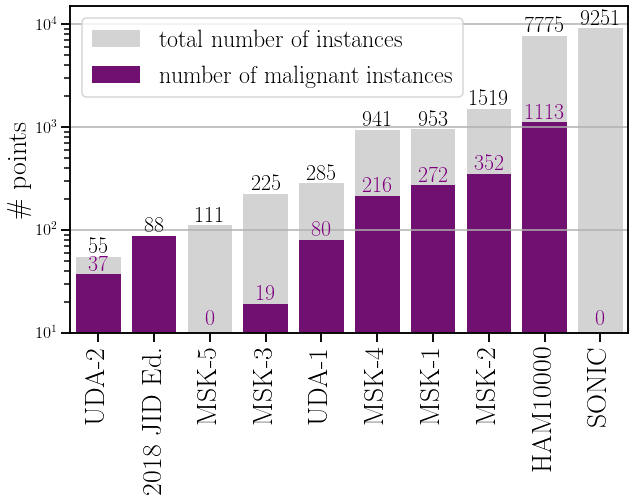

In [32]:
p.setup_fonts()
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(np.arange(10), total_num_pts[sorter], color='lightgrey', label = 'total number of  instances', ax = ax)
sns.barplot(np.arange(10), total_num_mal[sorter], color='purple', label = 'number of malignant instances', ax = ax)
ax.set_ylabel('\# points', fontsize=28)
ax.set_xticks(np.arange(10))

study_names_print = []
for x in sorter:
    this_name = list(np.unique(df_with_sonic['study_name']))[x]
    if this_name == '2018 JID Editorial Images':
        study_names_print.append('2018 JID Ed.')
    else:
        study_names_print.append(this_name)
    
    
ax.set_xticklabels(study_names_print, rotation=90, fontsize=28)
ax.legend(fontsize=24)

for i, (n_pts, n_pts_mal) in enumerate(zip(total_num_pts[sorter],total_num_mal[sorter])):
    ax.text(i,n_pts*1.1, n_pts, color='black', ha="center", fontsize=22)
    
    if n_pts_mal > 0 and n_pts_mal < n_pts:
        ax.text(i,n_pts_mal*1.1, n_pts_mal, color='purple', ha="center", fontsize=22)
        
    if n_pts_mal  == 0:
        ax.text(i,12, '0', color='purple', ha="center", fontsize=22)
    
ax.grid(axis='y')
ax.set_yscale('log')
ax.set_ylim(10,15000)

plt.savefig('../../figures/isic_substudies.pdf',bbox_inches='tight')

In [16]:
ages = list(df_no_sonic.groupby('age_approx').count().index)
cdf_unnorm = df_no_sonic.groupby('age_approx').count()['image_name'].values.cumsum()
cdf = cdf_unnorm / cdf_unnorm[-1]

In [17]:
no_sonic_file

'/data/erolf/multi-acc/data/isic/df_no_sonic_age_over_50_id_5_fold_splits.csv'

In [18]:
#plt.plot(ages, cdf)
plt.scatter(ages, cdf)

plt.axhline(0.5, color='black')

plt.axvline(52.5, color='black')

#plt.hist(df_no_sonic["age_approx"].values, bins=17)
plt.xlabel(r'age_approx')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fb8bf9e77a0> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'age_approx'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/home/eecs/erolf/.cache/matplotlib/tex.cache/3b8f9b68dd0a535b44d733f0f548e79f.
tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./3b8f9b68dd0a535b44d733f0f548e79f.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 ...tsize{18.000000}{22.500000}{\rmfamily age_
                                                  approx}
No pages of output.
Transcript written on 3b8f9b68dd0a535b44d733f0f548e79f.log.




RuntimeError: latex was not able to process the following string:
b'age_approx'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/home/eecs/erolf/.cache/matplotlib/tex.cache/3b8f9b68dd0a535b44d733f0f548e79f.
tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./3b8f9b68dd0a535b44d733f0f548e79f.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 ...tsize{18.000000}{22.500000}{\rmfamily age_
                                                  approx}
No pages of output.
Transcript written on 3b8f9b68dd0a535b44d733f0f548e79f.log.




<Figure size 432x288 with 1 Axes>

In [19]:
df_no_sonic_plot = df_no_sonic.rename(columns={'age_approx': 'ageapprox',
                                           'benign_malignant_01': 'benignmalignant01'}
                                          )

Text(0, 0.5, 'frequency')

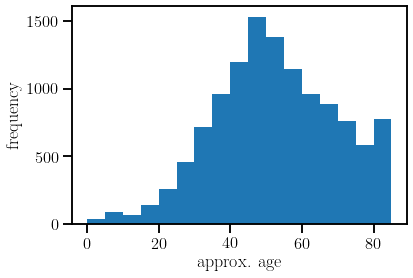

In [20]:
plt.hist(df_no_sonic_plot["ageapprox"].values, bins=17)
plt.xlabel('approx. age')
plt.ylabel('frequency')

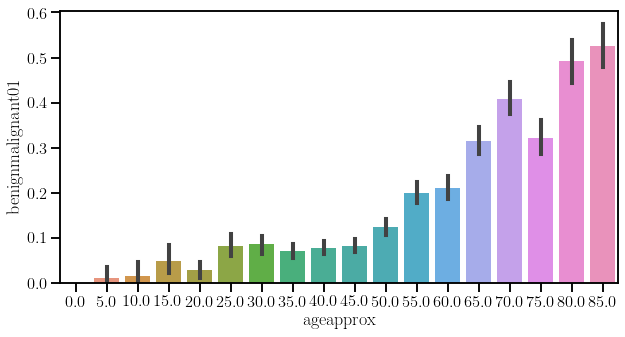

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x="ageapprox", y="benignmalignant01", data=df_no_sonic_plot)

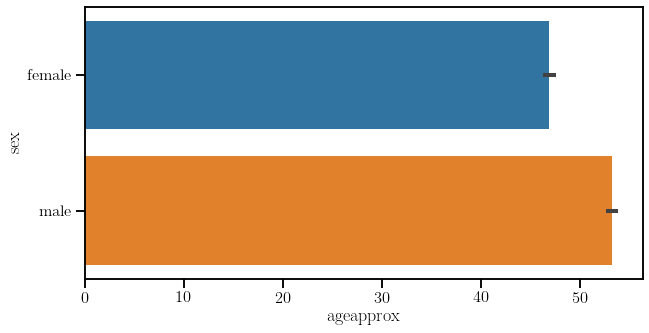

In [22]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x="ageapprox", y="sex", data=df_no_sonic_plot)